# Практическая работа 2

## 0. Условие задачи

Решите краевую задачу методом «стрельбы». Постройте график и сравните с графиком реального решения. Стрелять нужно «вправо», то есть задавать производную на левой границе отрезка.

\begin{equation*}
 \begin{cases}
   x^2 - y'' - xy' = 3 x^2, x \in [1;2],\\
   y(1) = 2, y(2) = 9.
 \end{cases}
\end{equation*}

## 1. Поиск точного решения

Имеем неоднородное дифференциальное уравнение второго порядка с переменными коэффициентами:

\begin{equation*}
  y'' + xy' = -2x^2.
\end{equation*}

Решаем однородное уравнение:

\begin{equation*}
  y'' + xy' = 0 => y_1 = C_1.
\end{equation*}

По формуле Лиувилля-Остроградского:

\begin{equation*}
  W(x) = W(x_0) exp( - \int_{x_0}^x a_1(t) dt);
\end{equation*}

\begin{equation*}
  \begin{vmatrix}
    C_1 & y_2(x)\\
    0 & y_{2}'(x)
  \end{vmatrix} = W(x_0) exp( - \int_{x_0}^x t dt) = W(x_0) exp( - t^2/2 |_{x_0}^x) = W_2 exp( - x^2 / 2) = C_1 y_{2}'(x) =>\\
  => y_{2} = \frac{W_2}{C_1} \int exp( - x^2 / 2) dx = - \frac{W_2}{C_1 \cdot x} exp( - x^2 / 2).
\end{equation*}

Имеем:

\begin{equation*}
  y_0 = C_1 + C_2 \cdot \frac{1}{x} exp( - x^2 / 2).
\end{equation*}  
  
Метод вариации постоянной:

\begin{equation*}
 \begin{cases}
   C_1'(x) + C_2'(x) \frac{1}{x} exp( - x^2 / 2) = 0,\\
   C_2'(x) [- \frac{1}{x^2} exp( - x^2 / 2) - exp( - x^2 / 2)] = -2 x^2.
 \end{cases}
\end{equation*}

Окончтельно имеем неберущийся интеграл:

\begin{equation*}
  C_2(x) = \int \frac{2x^4 exp(x^2 / 2)}{1 + x^2} dx.
\end{equation*}

## 2. Решение методом «стрельбы»

Исходную систему можно преобразовать к виду:

\begin{equation*}
 y_0 = 2;
\end{equation*}

\begin{equation*}
 \frac{y_1 - y_0}{h} = \alpha => y_1 = y_0 + \alpha h => y_1 = 2 + \alpha h;
\end{equation*}

\begin{equation*}
 \frac{y_{n+1} - 2 y_{n} + y_{n-1}}{h^2} + x_n \frac{y_{n+1} - y_{n-1}}{2h} = -2 x_n^2, \space n \in [2, N-1].
\end{equation*}

Имеем:

\begin{equation*}
 y_{n+1} = \frac{-2 x_n^2 + \frac{2y_n}{h^2} + (\frac{x_n}{2h} - \frac{1}{h^2}) y_{n-1}}{\frac{1}{h^2} + \frac{x_n}{2h}}.
\end{equation*}

При различных $\alpha$ получим различные значения при $x = 2$. Методом деления отрезка пополам или методом Ньютона можем приблизить значения $y_N$ к $y(2) = 9$.

-218.57123538807576
-229.9993896484375


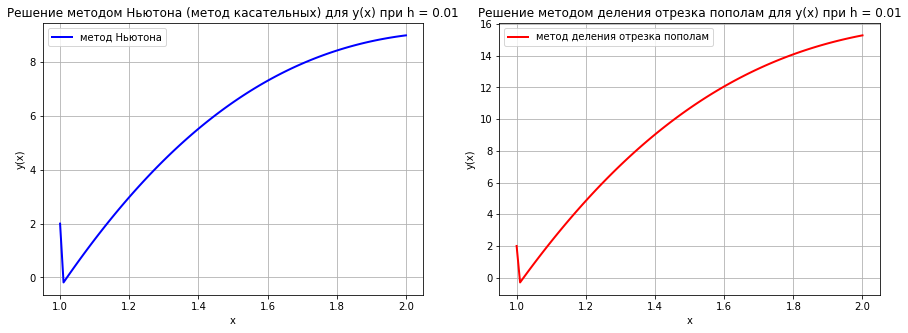

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5 #height
plt.rcParams["figure.figsize"] = fig_size


# constants
x_min = 1
x_max = 2

h = 10**-2
N = int((x_max - x_min) / h) + 1

alpha = -10
delta = 10**-3
y_N_exact = 9

y = np.zeros(N)

y[0] = 2

x = np.linspace(x_min, x_max, num=N)

# метод Ньютона (метод касательных)
while(True):
    y[1] = y[0] + (alpha+h) * h
    for n in range(2, N-1):
        y[n + 1] = (-2*x[n]**2 + 2*y[n]/h**2 + (x[n]/(2*h) - 1/h**2)*y[n-1])/(1/h**2 + x[n]/(2*h))
    f_h = y[N-1] - y_N_exact

    y[1] = y[0] + alpha * h
    for n in range(2, N-1):
        y[n + 1] = (-2*x[n]**2 + 2*y[n]/h**2 + (x[n]/(2*h) - 1/h**2)*y[n-1])/(1/h**2 + x[n]/(2*h))
    f = y[N-1] - y_N_exact

    df = (f_h - f)/h
    alpha_new = alpha - f / df
    
#     if abs(alpha_new - alpha) < delta/2:
#         break
        
    if y_N_exact - delta <= y[N-1] and y[N-1] <= y_N_exact + delta:
        break
        
    alpha = alpha_new

print(alpha_new)
y[1] = y[0] + alpha_new * h
for n in range(2, N-1):
    y[n + 1] = (-2*x[n]**2 + 2*y[n]/h**2 + (x[n]/(2*h) - 1/h**2)*y[n-1])/(1/h**2 + x[n]/(2*h))

ax = plt.subplot(1,2,1)
plt.plot(x, y, color='blue', label='метод Ньютона', linewidth=2.0)
ax.set_title(f"Решение методом Ньютона (метод касательных) для y(x) при h = {h}")
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.legend()
plt.grid()


# Метод деления отрезка пополам
alpha_from = -230
alpha_to = -210
while(True):
    alpha = (alpha_from+alpha_to)/2
    y[1] = y[0] + alpha * h
    for n in range(2, N-1):
        y[n + 1] = (-2*x[n]**2 + 2*y[n]/h**2 + (x[n]/(2*h) - 1/h**2)*y[n-1])/(1/h**2 + x[n]/(2*h))
    
    if alpha_to - alpha_from < 2*delta:
        break
        
    if y[N-1] < y_N_exact - delta:
        alpha_from = alpha
    elif y[N-1] > y_N_exact + delta:
        alpha_to = alpha
    else:
        break

print(alpha)
y[1] = y[0] + alpha * h
for n in range(2, N-1):
    y[n + 1] = (-2*x[n]**2 + 2*y[n]/h**2 + (x[n]/(2*h) - 1/h**2)*y[n-1])/(1/h**2 + x[n]/(2*h))

ax = plt.subplot(1,2,2)
plt.plot(x, y, color='red', label='метод деления отрезка пополам', linewidth=2.0)
ax.set_title(f"Решение методом деления отрезка пополам для y(x) при h = {h}")
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.legend()
plt.grid()

plt.savefig('result.png')

## 3. Анализ результатов

Отклонение результатов метода деления отрезка пополам от более точного решения методом Ньютона вызвано тем, что выполняется условие на выход из бесконечного цикла метода деления отрезка пополам:

    if alpha_to - alpha_from < 2*delta:
        break
        
При попытке убрать условие цикл выполняется очень долго. При уменьшении delta, полученное решение должно стремиться к точному решению.